# comparing termination time dependence on domain size
Tim Tyree<br>
6.10.2025

In [3]:
from lib.my_initialization import *

In [7]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# define module

# plot termination versus domain size for the full models

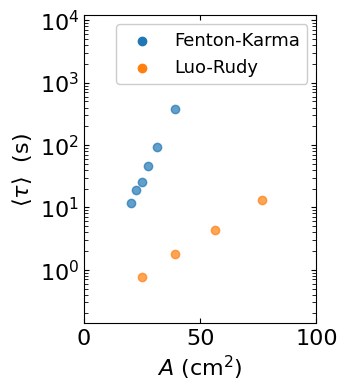

(0.0, 100.0, 0.13850549065122997, 12000.0)

In [9]:
data_folder = f"{nb_dir}/Data/full_results"
os.path.exists(data_folder)



Nbar_dir = os.path.join(data_folder,'Nbar_vs_A_full.csv')
taubar_dir = os.path.join(data_folder,'taubar_vs_A_full.csv')
df_Nbar = pd.read_csv(Nbar_dir)
df_taubar = pd.read_csv(taubar_dir)
# df_taubar
# df_Nbar



from scipy.optimize import dual_annealing
#only magnitude is to be varied
def comp_ss_err(x,*args):
    A_values,tau_values,powr,navg = args
    tau_pred_values = x * (2/A_values)**(powr) * np.exp(A_values*navg*powr/2)
    se = (tau_values-tau_pred_values) ** 2
    sse = np.sum(se)
    #return sse
    #smpe = np.sum(np.log(tau_pred_values/tau_values))
    smpe = np.mean( se / tau_values**2 )
    return smpe


xfk = df_taubar[df_taubar['model_name']=='FK']['A'].values
yfk = df_taubar[df_taubar['model_name']=='FK']['taubar'].values
xlr = df_taubar[df_taubar['model_name']=='LR']['A'].values
ylr = df_taubar[df_taubar['model_name']=='LR']['taubar'].values


# Mp = dict_fit_birth_fk['M']
# nup = dict_fit_birth_fk['m']
# Mm = dict_fit_death_fk['M']
# num = dict_fit_death_fk['m']
model_name='Fenton-Karma'
A_values = xfk
tau_values = yfk


# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
# model_name='Luo-Rudy'
# A_values = xlr
# tau_values = ylr

# #simulated annealing fit 
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# tau_pred_foo = lambda x: x * (2/A_values)**(powr) * np.exp(A_values*navg*powr/2)


#fk
# mag=2.033588801144e+00 ± 0.000000000000e+00
mag=2.0335888011441683
# res_again.x=array([2.0335888])
# # magfk=1.566390007127e+00 #± 3.762187006373e-09 #1e3 epochs
# # magfk=1.566390008379e+00 #± 5.014229476075e-09 #1e4 epochs
magfk = mag

maglr=9.319636219057e-01 #± 3.981174279133e-10 #1e3 epochs
maglr=9.319636257483e-01 #± 3.444428298138e-09 #1e4 epochs
maglr = mag


# Mp = dict_fit_birth_fk['M']
# nup = dict_fit_birth_fk['m']
# Mm = dict_fit_death_fk['M']
# num = dict_fit_death_fk['m']
model_name='Fenton-Karma'
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# yfk_pred = magfk * (2/xfk)**(powr) * np.exp(xfk*navg*powr/2)
# powrfk = float(powr)
# navgfk = float(navg)
# tau_pred_foofk = lambda x: float(magfk) * (2/x)**float(powrfk) * np.exp(x*float(navgfk*powrfk/2))


# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
model_name='Luo-Rudy'
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# ylr_pred = maglr * (2/xlr)**(powr) * np.exp(xlr*navg*powr/2)
# tau_pred_foolr = lambda x: float(maglr) * (2/x)**float(powr) * np.exp(x*float(navg*powr/2))


#plot the simulated annealing fits
figsize=(3,4)
fontsize=15
alpha=0.7
fig,ax=plt.subplots(figsize=figsize)
ax.scatter(xfk,yfk,c='C0',alpha=alpha,label='Fenton-Karma')
ax.scatter(xlr,ylr,c='C1',alpha=alpha,label='Luo-Rudy')
# # ax.scatter(xfk,yfk_pred,c='k',alpha=alpha,marker='+')#,label='Fenton-Karma')
# # ax.scatter(xlr,ylr_pred,c='k',alpha=alpha,marker='+')#,label='Luo-Rudy')
# # ax.scatter([A_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
# #            alpha=1,label='Fenton-Karma')
# # ax.scatter([A_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
# #            alpha=1,label='Luo-Rudy')
# # xv=np.linspace(0,40,10)
# # ax.plot(xv,taubar0fk*np.exp(xv/A0fk),':',color='gray')#,'k--',lw=2)
# # xv=np.linspace(0,80,10)
# # ax.plot(xv,taubar0lr*np.exp(xv/A0lr),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,40,10)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foofk(xv),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foolr(xv),':',color='gray')#,'k--',lw=2)

ax.set_xticks([0,50,100,150])

# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$\langle\tau\rangle$  (s)',fontsize=16)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
# ax.set_ylim([1e-2,100])
# # AddLegend(ax=ax,xy=(-0.12,0.240),fontsize=fontsize-3)
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,alpha=1.)#,frameon=False,ncol=1)
# leg.set_alpha(1.)
# , edgecolor="black")
leg.get_frame().set_alpha(None)
# leg.get_frame().set_facecolor((1, 1, 1, 1))
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.set_ylim([0.31392551380514033, 4e9])
ax.set_xlim([0.,100])
ax.set_ylim([0.13850549065122997,12000])
# AddLege nd(ax=ax,xy=(0.05,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.7,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.4,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
# ax.tick_params(axis='y', which='minor', left=True)
# plt.minorticks_on()
plt.show()
ax.axis()
#og src: http://localhost:8888/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb


# DONE: find out which L to use for each model

In [20]:
# L_values_fk = np.around(np.sqrt(xfk),5)
# L_values_lr = np.around(np.sqrt(xlr),5)
L_values_fk = np.array([4.5  , 4.75 , 5.   , 5.25 , 5.625, 6.25 ])
L_values_lr = np.array([5.  , 6.25, 7.5 , 8.75])

# DONE: dev next run

# DONE: time permitting, eat something.

# DONE: download the results and name

# DONE: parse results

In [22]:
# TODO: plot against particle model (run #46, N=2000 sims per data point)
taul_dir = f"{nb_dir}/data/osg_output/run_46_tau_vs_L.csv"
df_taul = pd.read_csv(taul_dir)
df_taul['A'] = df_taul['L'] ** 2

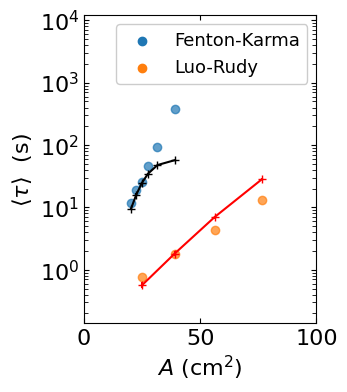

(0.0, 100.0, 0.13850549065122997, 12000.0)

In [26]:
figsize=(3,4)
fontsize=15
alpha=0.7
max_num_points_to_show = 4
fig,ax=plt.subplots(figsize=figsize)
# color_lst = ['C0','C1']
color_lst = ['k','r']
#plot particle model results
for i,(D,g) in enumerate(df_taul.groupby('D')):
    color = f"C{i}"
    color = color_lst[i]
#     g.plot.scatter(x='A',y='tau',color=color,ax=ax,marker='+')
    ax.errorbar(g['A'], g['tau'], yerr=g['Delta_tau'],color=color,marker='+')
    
#plot full model results
ax.scatter(xfk,yfk,c='C0',alpha=alpha,label='Fenton-Karma')
ax.scatter(xlr,ylr,c='C1',alpha=alpha,label='Luo-Rudy')
#plot the simulated annealing fits
# # ax.scatter(xfk,yfk_pred,c='k',alpha=alpha,marker='+')#,label='Fenton-Karma')
# # ax.scatter(xlr,ylr_pred,c='k',alpha=alpha,marker='+')#,label='Luo-Rudy')
# # ax.scatter([A_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
# #            alpha=1,label='Fenton-Karma')
# # ax.scatter([A_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
# #            alpha=1,label='Luo-Rudy')
# # xv=np.linspace(0,40,10)
# # ax.plot(xv,taubar0fk*np.exp(xv/A0fk),':',color='gray')#,'k--',lw=2)
# # xv=np.linspace(0,80,10)
# # ax.plot(xv,taubar0lr*np.exp(xv/A0lr),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,40,10)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foofk(xv),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foolr(xv),':',color='gray')#,'k--',lw=2)
ax.set_xticks([0,50,100,150])
# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$\langle\tau\rangle$  (s)',fontsize=16)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
# ax.set_ylim([1e-2,100])
# # AddLegend(ax=ax,xy=(-0.12,0.240),fontsize=fontsize-3)
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,alpha=1.)#,frameon=False,ncol=1)
# leg.set_alpha(1.)
# , edgecolor="black")
leg.get_frame().set_alpha(None)
# leg.get_frame().set_facecolor((1, 1, 1, 1))
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.set_ylim([0.31392551380514033, 4e9])
ax.set_xlim([0.,100])
ax.set_ylim([0.13850549065122997,12000])
# AddLege nd(ax=ax,xy=(0.05,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.7,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.4,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
# ax.tick_params(axis='y', which='minor', left=True)
# plt.minorticks_on()
plt.show()
ax.axis()
#og src: http://localhost:8888/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb

# TODO: recompute tau from full models but conditioned on $N_0=2$

In [44]:
#load fortranic tip positions
printing=True
nb_dir_ = '/Users/timothytyree/Documents/GitHub/care/notebooks'
# folder=f"{nb_dir_}/Data/from_wjr/positions_fk/200x200"
# folder=f"{nb_dir_}/Data/from_wjr/positions_fk/"
# fn = 'tippos_per_c_001'
folder=f"{nb_dir_}/Data/from_wjr/positions_lr/"
fn = 'tippos_per_001'
fldr_lst = sorted([x for x in os.listdir(folder) if x[0]!='.'])
parea_lst = [eval(x.replace('x','*')) for x in fldr_lst]
lfactor = 5/200 #cm/pixel
A_values = (lfactor **2) * np.array(parea_lst)
A_values_lr = A_values.copy()
L_values_lr = np.sqrt(A_values_lr)
print(f"{A_values_lr=}")

folder=f"{nb_dir_}/Data/from_wjr/positions_fk/"
fn = 'tippos_per_c_001'
# folder=f"{nb_dir_}/Data/from_wjr/positions_lr/200x200"
# fn = 'tippos_per_001'
fldr_lst = sorted([x for x in os.listdir(folder) if x[0]!='.'])
parea_lst = [eval(x.replace('x','*')) for x in fldr_lst]
# parea_lst = []
# for x in fldr_lst:
#     try:
#         parea_lst.append(eval(x.replace('x','*')))
#     except NameError as e: 
#        pass
lfactor = 5/200 #cm/pixel
A_values = (lfactor **2) * np.array(parea_lst)
A_values_fk = A_values.copy()
L_values_fk = np.sqrt(A_values_fk)
print(f"{A_values_fk=}")


print(f"{L_values_lr=}")
print(f"{L_values_fk=}")


A_values_lr=array([ 25.    ,  39.0625,  56.25  ,  76.5625, 100.    ])
A_values_fk=array([14.0625  , 25.      , 39.0625  , 50.055625, 76.5625  ])
L_values_lr=array([ 5.  ,  6.25,  7.5 ,  8.75, 10.  ])
L_values_fk=array([3.75 , 5.   , 6.25 , 7.075, 8.75 ])


In [39]:
df_taul

,D,L,a,chi,tau,Delta_tau,num_obs,p_normal,A
0,0.048,4.500,1.552,2.939433,9.530372,0.417653,2000,9.730722e-01,20.250000
1,0.048,4.750,1.552,2.939433,16.109333,0.657802,2000,4.782612e-01,22.562500
2,0.048,5.000,1.552,2.939433,24.906398,0.876443,2000,6.575857e-01,25.000000
3,0.048,5.250,1.552,2.939433,34.713999,0.957091,1999,8.887704e-01,27.562500
4,0.048,5.625,1.552,2.939433,47.836443,0.829059,2000,5.736999e-01,31.640625
5,0.048,6.250,1.552,2.939433,57.260239,0.435285,2000,3.579202e-01,39.062500
6,0.420,5.000,9.300,2.075269,0.566962,0.061761,2000,7.165031e-18,25.000000
7,0.420,6.250,9.300,2.075269,1.823972,0.161797,2000,5.209048e-03,39.062500
8,0.420,7.500,9.300,2.075269,7.023152,0.380364,2000,6.428188e-01,56.250000
9,0.420,8.750,9.300,2.075269,28.336182,0.941926,2000,5.026513e-01,76.562500


In [29]:
use_save_df_to_parquet_by=True
use_save_df_to_parquet_by=False
input_dir = os.path.join(folder,fn)
log_folder_parquet=f'{folder}/positions'
assert os.path.exists(input_dir)
if use_save_df_to_parquet_by:
    df_log=parse_fortranic_tip_pos(input_dir)
    #partition df_log into a folder of tip logs
    save_df_to_parquet_by(df_log,log_folder_parquet,by='trial_num',compression='snappy',index=None)
    print(f"saved to spiral tip positions to {log_folder_parquet=}")
    #determine width and height of the computational domain input the discretization
    width,height=df_log.describe().loc['max'][['x','y']].values.T
    del df_log
else:
    width=200
    height=200

In [30]:
N0=2
constrain_to_N0=True
t_lst=[]
nv_lst=[]
np.random.seed(42)
for fn in os.listdir(log_folder_parquet):
    try:
        trial_num = eval(fn.split('=')[1])
        # load tip position data
        g=load_parquet_by_trial_num(trial_num=trial_num,folder_parquet=log_folder_parquet)
        n_series = g.groupby(by='t')['n'].min()
        t0_values = n_series[n_series==N0].index.values
        tf = n_series.index.values.max()
        t_values = tf-t0_values
        if len(t_values)>0:
            #record
            t_lst.extend(t_values)
    #         nv = g.groupby('t')['n'].mean()[::100] #once every 100ms
            nv = g.groupby('t')['n'].mean()[::10] #once every 10ms
            nv = nv[nv%2==0]
            if constrain_to_N0:
                t0 = np.random.choice(t0_values)
                nv = nv[nv.index.values>=t0].copy()
            nv_lst.extend(nv)
    except IndexError as e:
        pass
        #print(f"IndexError for {fn}: {e}")
# n_series.max()

18

In [33]:
#print summary stats for distribution of particle numbers
tau_values_fk = np.array(t_lst)
tau_values = tau_values_fk.copy()
meant,Delta_meant,num_obs,p_normal=comp_mean_bootstrap_uncertainty(tau_values)
print(f"{meant=},{Delta_meant=},{num_obs=},{p_normal=}")
median = np.median(tau_values)
q25 = np.quantile(tau_values,0.25)
q75 = np.quantile(tau_values,0.75)
print(f"median: {median} (IQR: {q25}-{q75}, N={tau_values.shape[0]})")
#

meant=24266.950787087593,Delta_meant=199.32778535124706,num_obs=81503,p_normal=0.01779248722735561
median: 14503.0 (IQR: 3766.5-32742.5, N=81503)


# dress up the plot to look nice and pretty

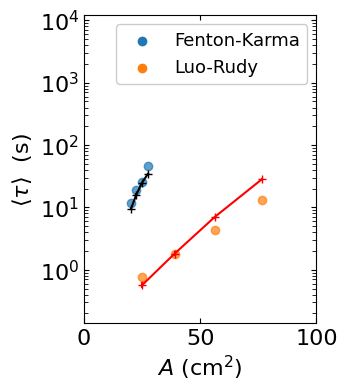

In [27]:
figsize=(3,4)
fontsize=15
alpha=0.7
max_num_points_to_show = 4
fig,ax=plt.subplots(figsize=figsize)
# color_lst = ['C0','C1']
color_lst = ['k','r']
mxpts=int(max_num_points_to_show)
#plot particle model results
for i,(D,g) in enumerate(df_taul.groupby('D')):
    color = f"C{i}"
    color = color_lst[i]
#     g.plot.scatter(x='A',y='tau',color=color,ax=ax,marker='+')
    ax.errorbar(g['A'][:mxpts], g['tau'][:mxpts], yerr=g['Delta_tau'][:mxpts],color=color,marker='+')
    
#plot full model results
ax.scatter(xfk[:mxpts],yfk[:mxpts],c='C0',alpha=alpha,label='Fenton-Karma')
ax.scatter(xlr[:mxpts],ylr[:mxpts],c='C1',alpha=alpha,label='Luo-Rudy')
#plot the simulated annealing fits
# # ax.scatter(xfk,yfk_pred,c='k',alpha=alpha,marker='+')#,label='Fenton-Karma')
# # ax.scatter(xlr,ylr_pred,c='k',alpha=alpha,marker='+')#,label='Luo-Rudy')
# # ax.scatter([A_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
# #            alpha=1,label='Fenton-Karma')
# # ax.scatter([A_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
# #            alpha=1,label='Luo-Rudy')
# # xv=np.linspace(0,40,10)
# # ax.plot(xv,taubar0fk*np.exp(xv/A0fk),':',color='gray')#,'k--',lw=2)
# # xv=np.linspace(0,80,10)
# # ax.plot(xv,taubar0lr*np.exp(xv/A0lr),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,40,10)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foofk(xv),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foolr(xv),':',color='gray')#,'k--',lw=2)
ax.set_xticks([0,50,100,150])
# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$\langle\tau\rangle$  (s)',fontsize=16)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
# ax.set_ylim([1e-2,100])
# # AddLegend(ax=ax,xy=(-0.12,0.240),fontsize=fontsize-3)
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,alpha=1.)#,frameon=False,ncol=1)
# leg.set_alpha(1.)
# , edgecolor="black")
leg.get_frame().set_alpha(None)
# leg.get_frame().set_facecolor((1, 1, 1, 1))
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.set_ylim([0.31392551380514033, 4e9])
ax.set_xlim([0.,100])
ax.set_ylim([0.13850549065122997,12000])
# AddLege nd(ax=ax,xy=(0.05,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.7,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.4,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
# ax.tick_params(axis='y', which='minor', left=True)
# plt.minorticks_on()
plt.show()
ax.axis()
#og src: http://localhost:8888/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb
plt.show()